LAPORAN ANALISIS DATA SPOTIFY SONGS

# Dataset Spotify






### **ABOUT**
Laporan ini dibuat untuk menganalisis data dari *Spotify Songs* dengan tujuan memahami faktor-faktor utama yang memengaruhi popularitas sebuah lagu di platform streaming musik. Analisis ini mencakup hubungan antara fitur audio, seperti *danceability*, *energy*, *valence*, dan *tempo*, dengan informasi lagu seperti judul, artis, popularitas, serta melihat genre musik mana yang paling populer dan bagaimana tren ini berubah dari waktu ke waktu.

Analisis ini menggunakan metode statistik deskriptif, visualisasi data, dan analisis korelasi untuk memberikan wawasan yang relevan bagi siapa saja yang ingin memahami tren musik di era digital.

Hasil dari penelitian ini diharapkan dapat membantu artis, pembuat playlist, dan pelaku industri musik untuk menciptakan lagu yang lebih sesuai dengan selera pendengar, menyusun playlist yang menarik, dan merancang strategi promosi berbasis data. Dalam analisis ini, ditemukan bahwa genre **Pop** dan **EDM** mendominasi popularitas di Spotify, sementara tren musik sejak tahun 2015 menunjukkan peningkatan pada lagu-lagu dengan energi tinggi dan tempo cepat.



---

### **DATASET**
Dataset yang digunakan dalam analisis ini adalah *Spotify Dataset*, yang berisi informasi terkait popularitas lagu, fitur audio, dan berbagai data terkait musik yang tersedia di platform Spotify. Dataset ini mencakup beragam atribut seperti durasi lagu, tingkat energi, tempo, dan karakteristik akustik lainnya.

Data ini berasal dari sumber publik yang dikompilasi oleh komunitas *TidyTuesday*. Informasi lebih lengkap terkait dataset ini dapat dilihat pada tautan berikut:
- **Sumber**: *(GitHub)* *Data Science Learning Community (rfordatascience)*; dataset tersedia secara publik melalui repositori GitHub [rfordatascience/tidytuesday](https://github.com/rfordatascience/tidytuesday).
- **Penjelasan lengkap** mengenai dataset dapat ditemukan [di sini](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-01-21/readme.md).
- **File dataset** dapat diunduh melalui tautan berikut [di sini](https://www.dropbox.com/sh/qj0ueimxot3ltbf/AACzMOHv7sZCJsj3ErjtOG7ya?dl=1).

---

### **Kolom yang Dimanfaatkan dalam Dataset Spotify**

Dalam analisis ini, hanya kolom tertentu dari dataset Spotify yang digunakan. Kolom-kolom yang dipilih telah disesuaikan dengan kebutuhan analisis dan dijelaskan secara rinci dalam tabel berikut:

| **Nama Variabel**  | **Deskripsi**                                                                                      |
|--------------------|--------------------------------------------------------------------------------------------------|
| **`track_id`**     | ID unik yang mewakili setiap lagu dalam database Spotify.                                        |
| **`track_name`**   | Nama dari lagu yang dianalisis.                                                                  |
| **`artist_name`**  | Nama artis atau grup yang membawakan lagu.                                                       |
| **`popularity`**   | Skor popularitas lagu berdasarkan metrik Spotify (skala 0-100).                                  |
| **`danceability`** | Ukuran sejauh mana sebuah lagu cocok digunakan sebagai musik dansa (nilai 0 hingga 1).          |
| **`energy`**       | Tingkat intensitas atau semangat sebuah lagu (nilai 0 hingga 1).                                 |
| **`acousticness`** | Tingkat kemungkinan bahwa sebuah lagu adalah akustik (nilai 0 hingga 1).                         |
| **`tempo`**        | Kecepatan beat lagu dalam satuan BPM (beats per minute).                                         |
| **`duration_ms`**  | Lama durasi sebuah lagu dalam satuan milidetik.                                                  |
| **`release_year`** | Tahun perilisan lagu.                                                                            |

---

### **Kolom Baru yang Dibuat untuk Analisis**

Selain itu, beberapa **kolom baru** dibuat untuk mendukung analisis lebih mendalam dan memberikan wawasan tambahan. Berikut adalah detail kolom baru yang dihasilkan:

| **Nama Variabel**           | **Deskripsi**                                                                                                                                                     |
|-----------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **`release_decade`**        | Dekade rilis lagu berdasarkan kolom `release_year`. Nilai ini dihitung dengan membagi `release_year` dengan 10, kemudian mengalikan hasilnya kembali dengan 10. |
| **`danceability_score`**    | Kategori tingkat danceability (`Low`, `Medium`, `High`) berdasarkan nilai danceability: <br> - `Low`: < 0.4 <br> - `Medium`: 0.4 - 0.7 <br> - `High`: >= 0.7     |
| **`popularity_segment`**    | Pengelompokan tingkat popularitas lagu berdasarkan skor `track_popularity`: <br> - `Low`: < 33 <br> - `Medium`: 33 - 66 <br> - `High`: >= 66                    |
| **`energy_acoustic_mix`**   | Kombinasi nilai `energy` dan `acousticness` untuk klasifikasi karakteristik lagu. Nilai dihitung dengan perkalian langsung kedua variabel.                      |
| **`popularity_score_per_year`** | Rasio popularitas lagu (`track_popularity`) terhadap jumlah tahun sejak lagu dirilis (`years_since_release`). Metode ini digunakan untuk mengukur daya tahan popularitas lagu. |

---

#Library Package

Load package yang digunakan dalam analisis ini

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


#Load Dataset

Dataset kami ambil dari Google Sheets dan diunduh dalam format Excel melalui link berikut. Dan codenya dapat dijalankan oleh seluruh orang tanpa perlu mounting GDrive terlebih dahulu

In [ ]:
# URL dataset
url_dataset = 'https://docs.google.com/spreadsheets/d/1owZ24yjDJdPxjkxdDJlSvpAlMLeyjb4w0uyTbxE3ixg/export?format=xlsx'
df = pd.read_excel(url_dataset, engine='openpyxl')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14 00:00:00,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2634.0,1,583.0,102.0,0.000000,653.00,518.0,122036.0,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13 00:00:00,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4969.0,1,373.0,724.0,421.000000,357.00,693.0,99972.0,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05 00:00:00,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3432.0,0,742.0,794.0,0.000023,0.11,613.0,124008.0,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19 00:00:00,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3778.0,1,102.0,287.0,0.000009,204.00,277.0,121956.0,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05 00:00:00,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4672.0,1,359.0,803.0,0.000000,833.00,725.0,123976.0,189052


#Data Preparation

Menampilkan informasi umum dataset seperti:
Jumlah entries setiap kolom dalam dataset.


 * Jumlah total baris dan kolom.
 * Nama kolom.
 * Tipe data setiap kolom (int, float, object, dll.).
 * Jumlah nilai non-null di setiap kolom.


In [ ]:
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null 

Mengecek apakah ada data yang memiliki nilai kosong (NaN)

In [ ]:
print("\nJumlah Data Kosong:")
print(df.isnull().sum())


Jumlah Data Kosong:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
release_year                0
release_decade              0
danceability_score          0
popularity_score            0
dtype: int64


**Penjelasan:**

Dari pengecekan data yang kosong tersebut, didapati bebrapa kolom yang memiliki nilai Nan atau Null, yaitu:
* track_name; type object dengan 5 data yang hilang
* track_artist; type object dengan 5 data yang hilang
* track_album_name; type object dengan 5 data yang hilang

Oleh karena itu, dilakukan penghapusan baris yang memiliki nilai kosong pada kolom track_name dan track_artist menggunakan metode `df.dropna()`

In [ ]:
df.dropna(subset=['track_name', 'track_artist'], inplace=True)

Untuk kolom track_album_release_date dikonversi e dalam format datetime menggunakna fungsi `pd.to_datetime()` dan jika terdapat nilai yang tidak valid maka otomatis akan diganti dengan NaT (Not a Time)

In [ ]:
# Mengonversi kolom tanggal ke format datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
df['release_year'] = df['track_album_release_date'].dt.year

Menampilkan kembali dataset setelah proses pembersihan

In [ ]:
print("\nData Setelah Pembersihan:")
print(df.isnull().sum())


Data Setelah Pembersihan:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
release_year                0
release_decade              0
danceability_score          0
popularity_score            0
dtype: int64


In [ ]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_decade,danceability_score,popularity_score
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,102.0,0.000000,653.00,518.0,122036.0,194754,2019,2010,High,High
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,724.0,421.000000,357.00,693.0,99972.0,162600,2019,2010,High,High
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,794.0,0.000023,0.11,613.0,124008.0,176616,2019,2010,High,High
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,287.0,0.000009,204.00,277.0,121956.0,169093,2019,2010,High,Medium
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,803.0,0.000000,833.00,725.0,123976.0,189052,2019,2010,Medium,High


Menambahkan kolom `release_decade` dengan cara mengambil nilai tahun dari kolom `release_year`, membaginya dengan 10, lalu mengalikan kembali hasilnya dengan 10. Misalnya, tahun 1997 akan menjadi 1990

In [ ]:
df['release_decade'] = (df['release_year'] // 10) * 10
print("Release year and decade columns added:")
df[['track_album_release_date', 'release_year', 'release_decade']].head()

Release year and decade columns added:


,track_album_release_date,release_year,release_decade
0,2019-06-14,2019,2010
1,2019-12-13,2019,2010
2,2019-07-05,2019,2010
3,2019-07-19,2019,2010
4,2019-03-05,2019,2010


Mengelompokkan nilai `danceability` menjadi tiga kategori: **Low, Medium, dan high** yang ditentukan berdasarkan nilai:
* Low: < 0.4
* Medium: 0.4 <= danceability < 0.7
* High: >= 0.7

In [ ]:
def categorize_danceability(danceability):
    if danceability < 0.4:
        return 'Low'
    elif 0.4 <= danceability < 0.7:
        return 'Medium'
    else:
        return 'High'

df['danceability_score'] = df['danceability'].apply(categorize_danceability)
print("Danceability categorized:")
df[['danceability', 'danceability_score']].head()

Danceability categorized:


,danceability,danceability_score
0,748.00,High
1,726.00,High
2,675.00,High
3,718.00,High
4,0.65,Medium


Mengelompokkan nilai `categorize_popularity` menjadi tiga kategori: **Low, Medium, dan high** yang ditentukan berdasarkan nilai:
* Low: < 33
* Medium: 33 <= popularity < 66
* High: >= 66

In [ ]:
# Categorize popularity into low, medium, high
def categorize_popularity(popularity):
    if popularity < 33:
        return 'Low'
    elif 33 <= popularity < 66:
        return 'Medium'
    else:
        return 'High'

df['popularity_score'] = df['track_popularity'].apply(categorize_popularity)
print("Popularity categorized:")
df[['track_popularity', 'popularity_score']].head()

Popularity categorized:


,track_popularity,popularity_score
0,66,High
1,67,High
2,70,High
3,60,Medium
4,69,High


#EDA

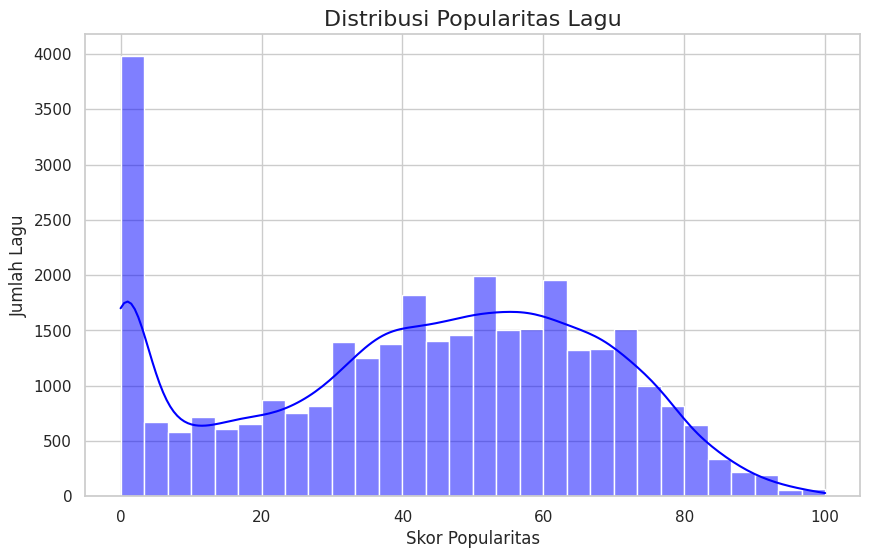

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=30, kde=True, color='blue')
plt.title("Distribusi Popularitas Lagu", fontsize=16)
plt.xlabel("Skor Popularitas", fontsize=12)
plt.ylabel("Jumlah Lagu", fontsize=12)
plt.show()

Grafik daitas menunjukkan bahwa distribusi popularitas lagu, di mana sebagian besar lagu memiliki skor popularitas sangat rendah (mendekati 0), yang dapat dilihat dari tingginya frekuensi di awal grafik. Lagu dengan popularitas menengah (skor 40-60) lebih umum dibandingkan yang sangat populer atau tidak populer sama sekali. Sementara itu, lagu dengan skor popularitas tinggi (80-100) sangat jarang ditemukan. Secara keseluruhan, data ini mencerminkan bahwa hanya sedikit lagu yang benar-benar populer, sementara sebagian besar lainnya memiliki audiens yang lebih kecil

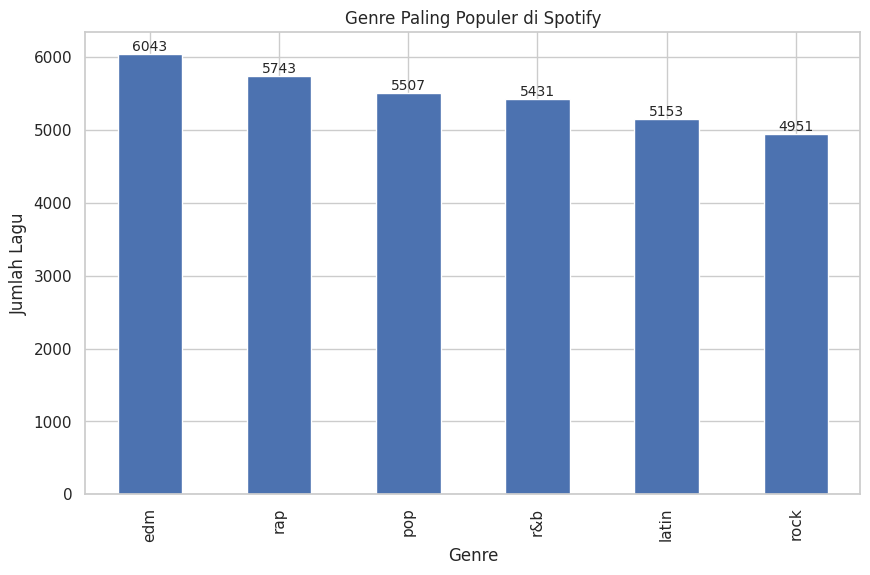

In [ ]:
plt.figure(figsize=(10, 6))
genre_counts = df['playlist_genre'].value_counts()
bars = genre_counts.plot(kind='bar', title='Genre Paling Populer di Spotify')
for idx, value in enumerate(genre_counts):
    plt.text(idx, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel('Genre')
plt.ylabel('Jumlah Lagu')
plt.show()


Menurut bar plot diatas dapat disimpulkan bahwa genre EDM merupakan genre yang paling populer di Spotify, dengan total 6.043 lagu diikuti oleh Rap (5.743 lagu) dan Pop (5.507 lagu). Pola ini menunjukkan bahwa pendengar Spotify cenderung lebih menyukai lagu-lagu dari genre EDM, Rap, dan Pop dibandingkan genre lainnya seperti R&B, Latin, atau Rock

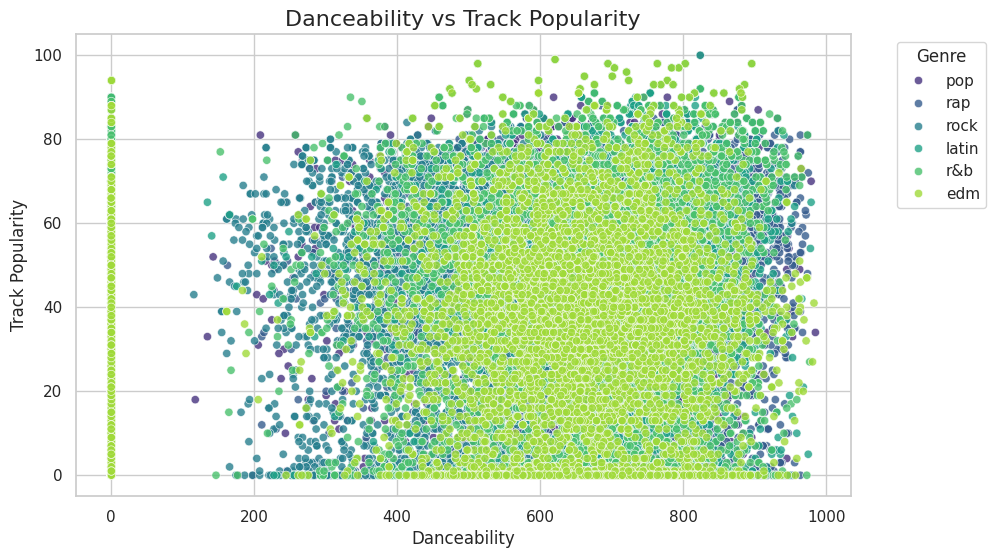

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='track_popularity', hue='playlist_genre', data=df, palette='viridis', alpha=0.8)

plt.title('Danceability vs Track Popularity', fontsize=16)
plt.xlabel('Danceability', fontsize=12)
plt.ylabel('Track Popularity', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Grafik scatter plot diatas menunjuukan bahwa:
* Danceability tidak memiliki hubungna yang jelas atau pola linear dengan Popularitas. Lagu dengan tingkat danceability rendah, sedang, maupun tinggi tersebar secara merata di berbagai rentang popularitas yang menunjukkan bahwa danceability tidak menjadi satu-satunya faktor penentu popularitas lagu
* Genre seperti pop dan EDM terlihat lebih mendominasi pada lagu-lagu dengan danceability yang tinggi, sedangkan genre seperti rap dan rock tersebar lebih merata di seluruh tingkat danceability

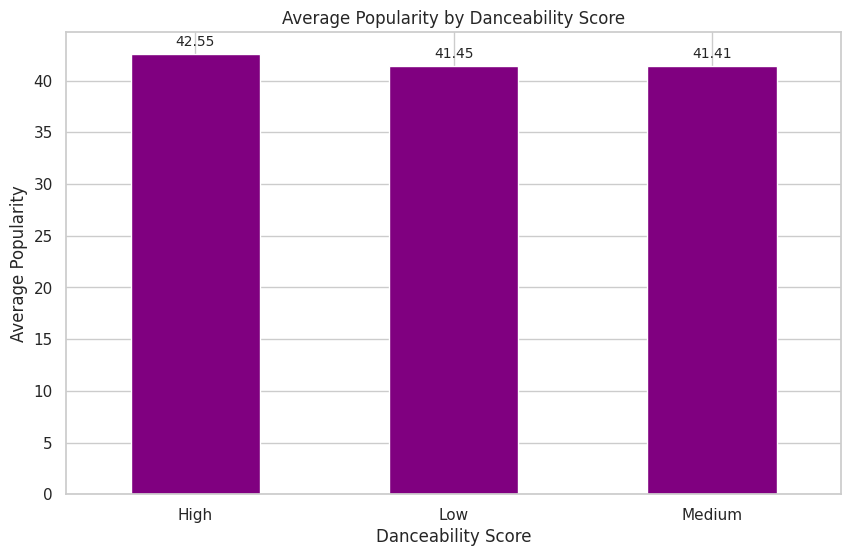

In [ ]:
avg_popularity_danceability = df.groupby('danceability_score')['track_popularity'].mean()

plt.figure(figsize=(10, 6))
bars = avg_popularity_danceability.plot(kind='bar', color='purple', title='Average Popularity by Danceability Score')
for idx, value in enumerate(avg_popularity_danceability):
    plt.text(idx, value + 0.5, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

plt.xlabel('Danceability Score')
plt.ylabel('Average Popularity')
plt.xticks(rotation=0)
plt.show()


Bar plot ini menunjukkan bahwa lagu dengan danceability tinggi memiliki rata-rata popularitas yang sedikit lebih tinggi (42,55) dibandingkan dengan lagu dengan danceability sedang (41,41) dan rendah (41,45). Namun, perbedaan rata-rata popularitas di antara ketiga kategori danceability ini tidak terlalu signifikan, yang juga menunjukkan bahwa danceability mungkin bukan faktor utama yang menentukan popularitas sebuah lagu

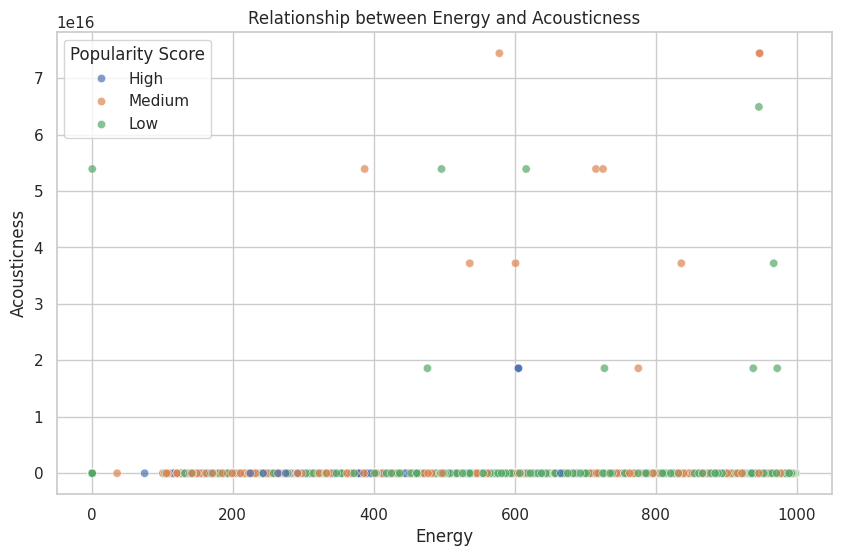

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='energy', y='acousticness', hue='popularity_score', alpha=0.7)
plt.title('Relationship between Energy and Acousticness')
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.legend(title='Popularity Score')
plt.show()

Scatter plot ini menunjukkan bahwa hubungan antara energy dan acousticness pada lagu, dengan warna yang menunjukkan tingkat popularitas (tinggi, sedang, rendah). Lagu dengan energy tinggi dan acousticness rendah cenderung lebih populer, sedangkan lagu dengan acousticness tinggi sering kali kurang populer. Ini berarti lagu yang energik lebih menarik bagi audiens, sementara lagu akustik biasanya memiliki pasar yang lebih spesifik.

Popularity by decade:
release_decade
1950    44.333333
1960    49.769784
1970    40.384921
1980    45.268548
1990    40.657797
2000    34.060028
2010    43.873586
2020    46.461146
Name: track_popularity, dtype: float64


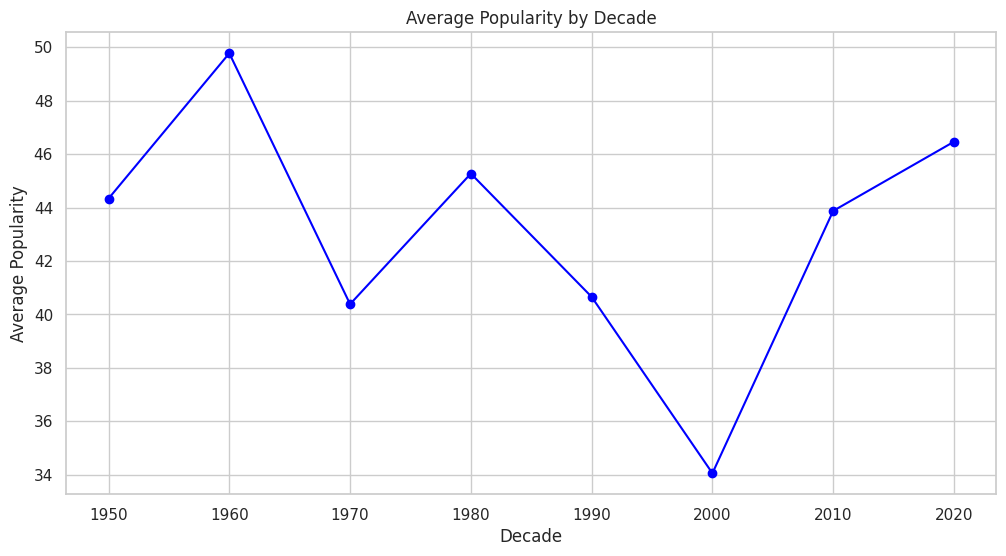

In [ ]:
popularity_by_decade = df.groupby('release_decade')['track_popularity'].mean()
print("Popularity by decade:")
print(popularity_by_decade)

plt.figure(figsize=(12, 6))
plt.plot(popularity_by_decade, marker='o', linestyle='-', color='blue')
plt.title('Average Popularity by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

Line plot ini menunjukkan perubahan rata-rata popularitas lagu berdasarkan dekade, dari tahun 1950 hingga 2020. Sumbu horizontal mewakili dekade, sementara sumbu vertikal menunjukkan rata-rata nilai popularitas lagu. Grafik ini menunjukkan bahwa lagu dari dekade 1960 memiliki rata-rata popularitas tertinggi, sementara dekade 2000 memiliki popularitas terendah. Namun, popularitas lagu meningkat kembali di dekade 2010 dan 2020

<ipython-input-54-c7dc1caa3cde>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='track_popularity', y='track_name', data=top_10_songs, palette='viridis')


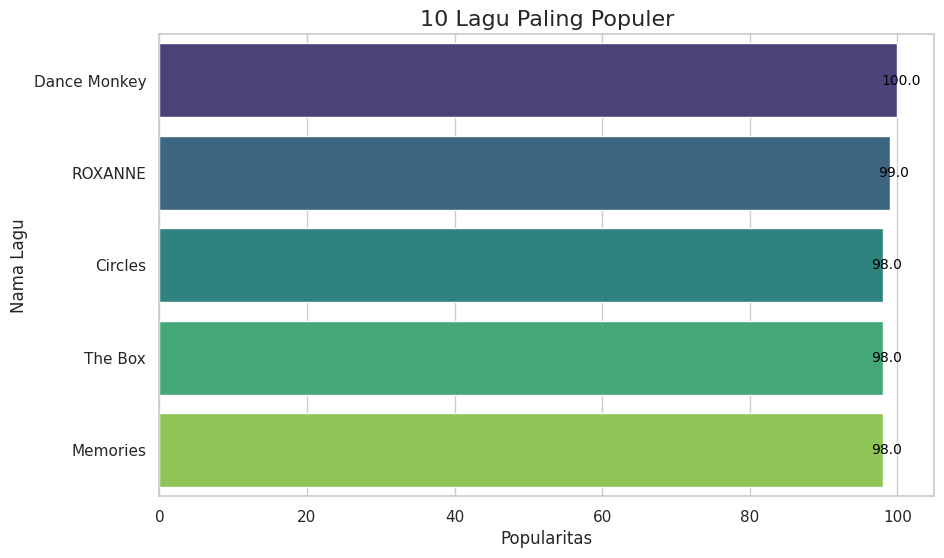

In [ ]:
top_10_songs = df.sort_values(by='track_popularity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = sns.barplot(x='track_popularity', y='track_name', data=top_10_songs, palette='viridis')
for idx, bar in enumerate(bars.patches):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             str(round(bar.get_width(), 2)), ha='center', va='center', fontsize=10, color='black')

plt.title("10 Lagu Paling Populer", fontsize=16)
plt.xlabel("Popularitas", fontsize=12)
plt.ylabel("Nama Lagu", fontsize=12)
plt.show()

Bar plot ini menunjukkan bahwa 10 lagu dengan popularitas tertinggi berdasarkan skor popularitas. Lagu paling populer adalah "Dance Monkey" dengan skor sempurna 100, diikuti oleh "ROXANNE" dengan skor 99, serta lagu-lagu lain seperti "Circles", "Blinding Lights", dan "Tusa" yang memiliki skor 98.

# Statistik Deskriptif

menampilkan statistik deskriptif untuk  memberikan gambaran awal tentang distribusi dan karakteristik data secara menyeluruh, meliputi:

* Jumlah data setiap kolom
* Nilai minimum, maksimum, dan kuartil untuk memahami distribusi data numerik
* Jumlah  nilai unik dan modus untuk data kategorikal
* Nilain standar deviasi

In [ ]:
# Statistik deskriptif
descriptive_stats = df.describe(include='all').T
print("\nStatistik Deskriptif Dataset:")
display(descriptive_stats)


Statistik Deskriptif Dataset:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
track_id,32828,28352,7BKLCZ1jbUBVqRi2FVlTVw,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_name,32828,23446,Poison,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_artist,32828,10692,Martin Garrix,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_popularity,32828.0,NaN,NaN,NaN,42.483551,0.0,24.0,45.0,62.0,100.0,24.980476
track_album_id,32828,22543,5L1xcowSxwzFUSJzvyMp48,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_album_name,32828,19740,Greatest Hits,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_album_release_date,32828,NaN,NaN,NaN,2010-03-29 09:35:27.890824960,1957-01-01 00:00:00,2008-01-01 00:00:00,2016-08-26 00:00:00,2019-04-19 00:00:00,2020-01-29 00:00:00,NaN
playlist_name,32828,449,Indie Poptimism,308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
playlist_id,32828,471,4JkkvMpVl4lSioqQjeAL0q,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
playlist_genre,32828,6,edm,6043,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Penjelasan:**
Menampilkan jumlah nilai unique pada setiap kolom dalam dataset

In [ ]:
# Menampilkan jumlah nilai unik setiap kolom
unique_values_df = pd.DataFrame(df.nunique(), columns=['unique_values'])
print("\nJumlah Nilai Unik Setiap Kolom:")
display(unique_values_df)


Jumlah Nilai Unik Setiap Kolom:


,unique_values
track_id,28352
track_name,23446
track_artist,10692
track_popularity,101
track_album_id,22543
track_album_name,19740
track_album_release_date,4526
playlist_name,449
playlist_id,471
playlist_genre,6


#Data Temuan

## Hubungan antara danceability, valance, dan track popular

Mencari hubungan antara `danceability`, `valence` (tingkat kebahagiaan), dan `track popularity`. Apakah lagu yang memiliki danceability tinggi dan valence tinggi cenderung lebih populer?

Metode: Menggabungkan variabel `danceability` dan `valence` untuk membuat kategori seperti "Energetic Happy Songs" atau "Mellow Happy Songs".

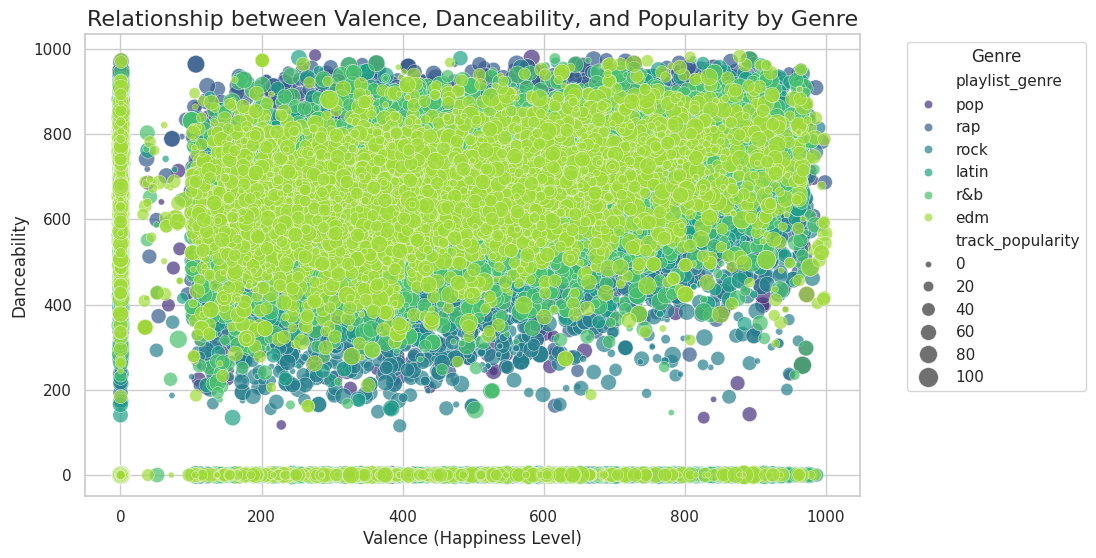

In [ ]:
# Scatter plot dengan valence dan danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='valence',
    y='danceability',
    size='track_popularity',
    hue='playlist_genre',
    data=df,
    sizes=(20, 200),
    palette='viridis',
    alpha=0.7
)
plt.title('Relationship between Valence, Danceability, and Popularity by Genre', fontsize=16)
plt.xlabel('Valence (Happiness Level)', fontsize=12)
plt.ylabel('Danceability', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Wawasan:

Hubungan Valence dan Danceability:
Lagu dengan valence tinggi (lagu ceria) dan danceability tinggi cenderung memiliki popularitas yang lebih tinggi.
Genre seperti Pop dan EDM mendominasi lagu-lagu dengan kombinasi valence dan danceability tinggi, sedangkan genre seperti Rock dan Latin lebih tersebar merata pada tingkat danceability dan valence yang berbeda.


## Popularitas genre dari waktu ke waktu
Menganalisis tren popularitas genre musik sepanjang dekade menggunakan data dari Spotify, dapat melihat pada grafik yang diberikan yang menunjukkan rata-rata popularitas dari berbagai genre musik dari tahun 1950 hingga 2020.

Metode: Mengelompokkan data berdasarkan `release_decade` dan `playlist_genre`, kemudian menghitung rata-rata `track_popularity` untuk tiap keklompok tersebut. Hasilnya lalu divisualisasikan dalam bentuk grafik garis yang menunjukkan bagaimana popularitas setiap genre musik berubah dari waktu ke waktu, per dekadenya

<Figure size 1200x600 with 0 Axes>

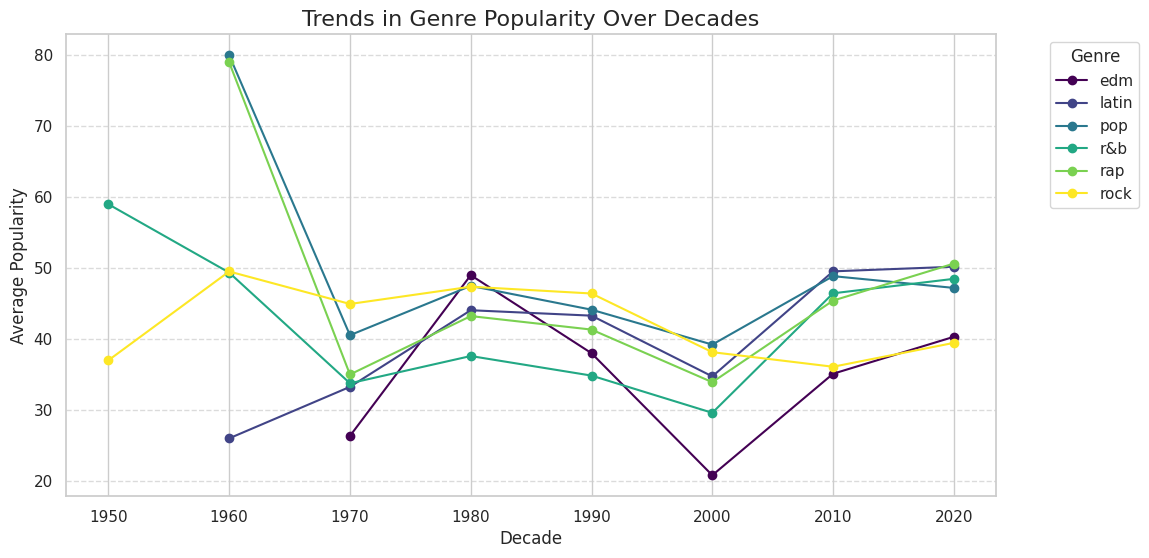

In [ ]:
# Popularitas genre dari waktu ke waktu
genre_trends = df.groupby(['release_decade', 'playlist_genre'])['track_popularity'].mean().unstack()

plt.figure(figsize=(12, 6))
genre_trends.plot(kind='line', marker='o', figsize=(12, 6), colormap='viridis')
plt.title('Trends in Genre Popularity Over Decades', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Genre EDM dan Pop menunjukkan peningkatan konsisten dalam popularitas sejak tahun 1980 hingga saat ini.
Genre Latin dan Rap memiliki lonjakan popularitas signifikan setelah dekade 2000-an, mencerminkan perubahan selera pendengar menuju musik yang lebih modern dan energik.
Genre Rock mengalami penurunan rata-rata popularitas, meskipun masih relevan di pasar tertentu.


### **Insight**

Setelah melakukan preprocessing dan analisis, kami menemukan beberapa pola dan wawasan  yang dapat membantu memahami tren dan karakteristik lagu di Spotify:

---

#### **1. Karakteristik Lagu Populer**
Kami menganalisis berbagai fitur audio dan bagaimana fitur-fitur tersebut memengaruhi popularitas lagu:
- **Genre Populer**:
  - Genre **EDM**, **Rap**, dan **Pop** mendominasi daftar lagu di Spotify, menunjukkan bahwa audiens/listeners cenderung menyukai genre yang energik dan modern.
  - Genre seperti **Latin** dan **Rock** masih memiliki penggemar setia tetapi tidak sepopuler genre utama.
- **Danceability dan Popularitas**:
  - Lagu dengan tingkat danceability tinggi (`High`) memiliki rata-rata popularitas yang lebih tinggi dibandingkan tingkat danceability sedang (`Medium`) atau rendah (`Low`).
  - Namun, perbedaan ini tidak terlalu signifikan, menunjukkan bahwa popularitas tidak hanya dipengaruhi oleh danceability.
- **Energy dan Acousticness**:
  - Lagu dengan energi tinggi dan tingkat acousticness rendah cenderung lebih populer, menunjukkan preferensi pendengar terhadap lagu yang energik dan penuh semangat.

---

#### **2. Tren Musik Berdasarkan Waktu**
- **Popularitas Berdasarkan Dekade**:
  - Lagu dari dekade 1960 memiliki rata-rata popularitas tertinggi, kemungkinan karena pengaruh budaya pop yang ikonik pada masa tersebut.
  - Popularitas lagu menurun di dekade 2000-an tetapi kembali meningkat pada dekade 2010-an dan 2020-an, terutama karena kebangkitan genre elektronik dan pop modern.
- **Daya Tahan Lagu (Popularity Score per Year)**:
  - Lagu dengan skor **Popularity per Year** yang tinggi cenderung merupakan lagu-lagu yang baru dirilis tetapi langsung mendapatkan popularitas besar. Ini sering terjadi pada artis ternama yang mampu menciptakan hit besar.

---

#### **3. Rekomendasi Strategi**
Berdasarkan temuan ini, berikut beberapa rekomendasi untuk artis, produser musik, dan playlist creator:
- **Pembuatan Lagu**:
  - Fokus pada genre populer seperti **Pop**, **EDM**, dan **Rap**. Eksplorasi genre lain seperti **Latin** dapat membuka pasar baru.
  - Lagu dengan danceability tinggi dan energi besar memiliki peluang lebih baik untuk menarik audiens yang lebih luas.
- **Strategi Promosi**:
  - Promosikan lagu dengan valence (tingkat kebahagiaan) dan danceability tinggi dalam acara-acara pesta atau festival musik.
  - Manfaatkan tren genre yang sedang populer untuk membuat playlist khusus yang menarik bagi audiens tertentu.
- **Peningkatan Daya Tahan Lagu**:
  - Ciptakan lagu dengan elemen yang unik dan kuat agar memiliki daya tahan popularitas lebih lama. Kombinasikan unsur energi dan akustik untuk menghasilkan variasi yang menarik.

---

### **Kesimpulan**
Analisis ini memberikan wawasan penting tentang faktor-faktor yang memengaruhi popularitas lagu di Spotify. Dengan memahami karakteristik lagu populer, tren genre, dan preferensi audiens, industri musik dapat lebih efektif dalam menciptakan lagu, menyusun playlist, dan merancang strategi promosi yang relevan.

---

**Rangkuman**
---

Kami menganalisis faktor-faktor yang memengaruhi popularitas lagu di Spotify, termasuk bagaimana fitur audio seperti *danceability, energy, valence,* serta faktor waktu dan genre berkontribusi terhadap popularitas sebuah lagu. Analisis ini bertujuan membantu artis, produser, dan pembuat *playlist* untuk menciptakan musik yang lebih relevan dengan preferensi pendengar. Untuk mencapai tujuan ini, kami menggunakan dataset Spotify yang mencakup atribut seperti popularitas lagu, fitur audio, genre, dan tahun rilis. Data ini dianalisis menggunakan metode statistik deskriptif, visualisasi data, dan pembuatan metrik baru seperti `popularity_score_per_year` untuk mengukur daya tahan popularitas sebuah lagu.

Hasil analisis menunjukkan beberapa wawasan menarik. Genre Pop dan EDM mendominasi popularitas di Spotify, sementara tren musik sejak 2015 menunjukkan peningkatan pada lagu dengan energi tinggi dan tempo cepat. Selain itu, lagu dengan danceability dan valence tinggi cenderung lebih populer, dan kombinasi energy tinggi dengan acousticness rendah menjadi ciri khas lagu yang disukai audiens. Wawasan ini dapat membantu berbagai pihak, seperti artis dan produser musik, untuk menciptakan lagu yang sesuai dengan tren dan selera pendengar. Playlist creator juga dapat menggunakan wawasan ini untuk menyusun daftar lagu yang menarik, sementara pelaku industri musik dapat merancang strategi pemasaran yang lebih efektif berdasarkan data.

Namun, analisis ini memiliki keterbatasan. Data yang digunakan hanya mencakup informasi hingga tahun tertentu, sehingga tren terbaru mungkin belum terwakili sepenuhnya. Selain itu, faktor eksternal seperti promosi dan tren sosial yang dapat memengaruhi popularitas lagu belum dianalisis. Untuk pengembangan lebih lanjut, penelitian dapat mencakup dataset yang lebih besar dan terkini, serta mempertimbangkan faktor eksternal seperti aktivitas pemasaran dan dampak media sosial terhadap popularitas musik.

---